# ctsm5.1.dev020 merge test and baseline comparison - fuel moisture difference analysis

This notebook compares the results of merging in ctsm5.1.dev020 tag into fates_main_api and comparing it against a variety of difference merged dev tags.  This was undertaken to determine where the initialization differences against the fates_main_api baseline.  This only looks at the `FIRE_FUEL_EFF_MOIST` which was indicative of the difference.

## Import libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Load history output data

In [3]:
filename_history_test_020 = 'data/ctsm5.1.dev020-f45test.nc' # fma-merge-ctsm5.1.dev020 - 10 years
filename_history_test_006 = 'data/ctsm5.1.dev006-f45test.nc' # fma-merge-ctsm5.1.dev006 - 1 years
filename_history_test_002 = 'data/ctsm5.1.dev002-f45test.nc' # fma-merge-ctsm5.1.dev002 - 10 years
filename_history_test_001 = 'data/ctsm5.1.dev001-f45test.nc' # fma-merge-ctsm5.1.dev001 - 1 years
filename_history_base = 'data/ctsm1.0.dev113-f45test.nc' # fates_main_api branch - 10 yers
data_test_020 = xr.open_dataset(filename_history_test_020)
data_test_006 = xr.open_dataset(filename_history_test_006)
data_test_002 = xr.open_dataset(filename_history_test_002)
data_test_001 = xr.open_dataset(filename_history_test_001)
data_base = xr.open_dataset(filename_history_base)

## Select data subsets

Fuel moisture

In [4]:
fuel_moisture_020 = data_test_020.FUEL_MOISTURE_NFSC
fuel_moisture_006 = data_test_006.FUEL_MOISTURE_NFSC
fuel_moisture_002 = data_test_002.FUEL_MOISTURE_NFSC
fuel_moisture_001 = data_test_001.FUEL_MOISTURE_NFSC
fuel_moisture_base = data_base.FUEL_MOISTURE_NFSC

fuel_moisture_bdiff_020 = fuel_moisture_base - fuel_moisture_020
fuel_moisture_bdiff_006 = fuel_moisture_base - fuel_moisture_006
fuel_moisture_bdiff_002 = fuel_moisture_base - fuel_moisture_002
fuel_moisture_bdiff_001 = fuel_moisture_base - fuel_moisture_001

fuel_moisture_tdiff_020 = fuel_moisture_020 - fuel_moisture_020
fuel_moisture_tdiff_006 = fuel_moisture_006 - fuel_moisture_020
fuel_moisture_tdiff_002 = fuel_moisture_002 - fuel_moisture_020
fuel_moisture_tdiff_001 = fuel_moisture_001 - fuel_moisture_020

Fire Nesterov index

In [5]:
fire_nesterov_020 = data_test_020.FIRE_NESTEROV_INDEX
fire_nesterov_006 = data_test_006.FIRE_NESTEROV_INDEX
fire_nesterov_002 = data_test_002.FIRE_NESTEROV_INDEX
fire_nesterov_001 = data_test_001.FIRE_NESTEROV_INDEX
fire_nesterov_base = data_base.FIRE_NESTEROV_INDEX

fire_nesterov_bdiff_020 = fire_nesterov_base - fire_nesterov_020
fire_nesterov_bdiff_006 = fire_nesterov_base - fire_nesterov_006
fire_nesterov_bdiff_002 = fire_nesterov_base - fire_nesterov_002
fire_nesterov_bdiff_001 = fire_nesterov_base - fire_nesterov_001

fire_nesterov_tdiff_020 = fire_nesterov_020 - fire_nesterov_020
fire_nesterov_tdiff_006 = fire_nesterov_006 - fire_nesterov_020
fire_nesterov_tdiff_002 = fire_nesterov_002 - fire_nesterov_020
fire_nesterov_tdiff_001 = fire_nesterov_001 - fire_nesterov_020

Effective Fuel moisture

In [6]:
fuel_eff_moist_test_020 = data_test_020.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_test_006 = data_test_006.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_test_002 = data_test_002.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_test_001 = data_test_001.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_base = data_base.FIRE_FUEL_EFF_MOIST

fuel_eff_moist_bdiff_020 = fuel_eff_moist_base - fuel_eff_moist_test_020
fuel_eff_moist_bdiff_006 = fuel_eff_moist_base - fuel_eff_moist_test_006
fuel_eff_moist_bdiff_002 = fuel_eff_moist_base - fuel_eff_moist_test_002
fuel_eff_moist_bdiff_001 = fuel_eff_moist_base - fuel_eff_moist_test_001

fuel_eff_moist_tdiff_020 = fuel_eff_moist_test_020 - fuel_eff_moist_test_020
fuel_eff_moist_tdiff_006 = fuel_eff_moist_test_006 - fuel_eff_moist_test_020
fuel_eff_moist_tdiff_002 = fuel_eff_moist_test_002 - fuel_eff_moist_test_020
fuel_eff_moist_tdiff_001 = fuel_eff_moist_test_001 - fuel_eff_moist_test_020

## Plot the data

_Effective Fuel moisture at start_

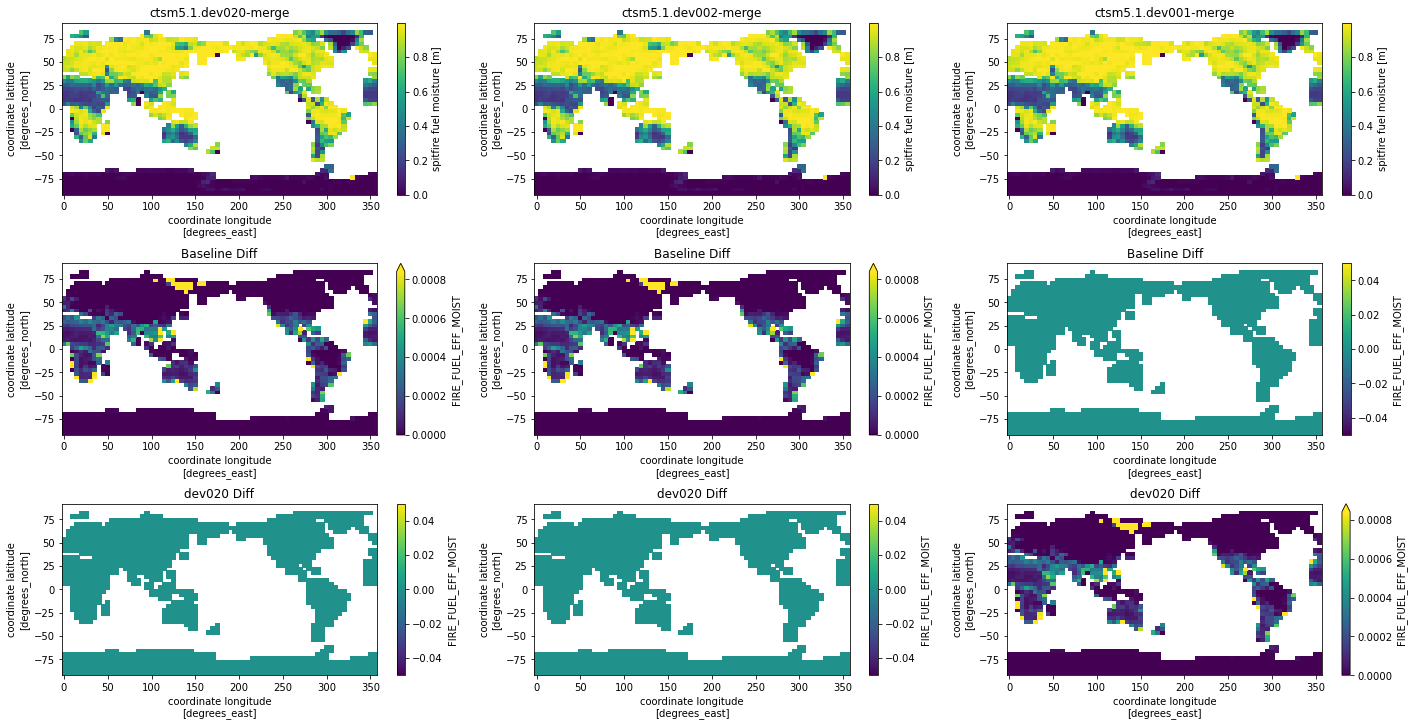

In [7]:
tstop_idx = 0
# tstop_idx = 119
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(24, 12))
fuel_eff_moist_test_020.isel(time=tstop_idx).plot(ax=ax1)
fuel_eff_moist_test_002.isel(time=tstop_idx).plot(ax=ax2)
fuel_eff_moist_test_001.isel(time=tstop_idx).plot(ax=ax3)

fuel_eff_moist_bdiff_020.isel(time=tstop_idx).plot(ax=ax4,robust=True)
fuel_eff_moist_bdiff_002.isel(time=tstop_idx).plot(ax=ax5,robust=True)
fuel_eff_moist_bdiff_001.isel(time=tstop_idx).plot(ax=ax6,robust=True)

fuel_eff_moist_tdiff_020.isel(time=tstop_idx).plot(ax=ax7,robust=True)
fuel_eff_moist_tdiff_002.isel(time=tstop_idx).plot(ax=ax8,robust=True)
fuel_eff_moist_tdiff_001.isel(time=tstop_idx).plot(ax=ax9,robust=True)

ax1.set_title('ctsm5.1.dev020-merge')
ax2.set_title('ctsm5.1.dev002-merge')
ax3.set_title('ctsm5.1.dev001-merge')
ax4.set_title('Baseline Diff');
ax5.set_title('Baseline Diff');
ax6.set_title('Baseline Diff');
ax7.set_title('dev020 Diff');
ax8.set_title('dev020 Diff');
ax9.set_title('dev020 Diff');
plt.subplots_adjust(hspace=0.4)

From the above plots we find that the difference between 

_Diff of diffs_

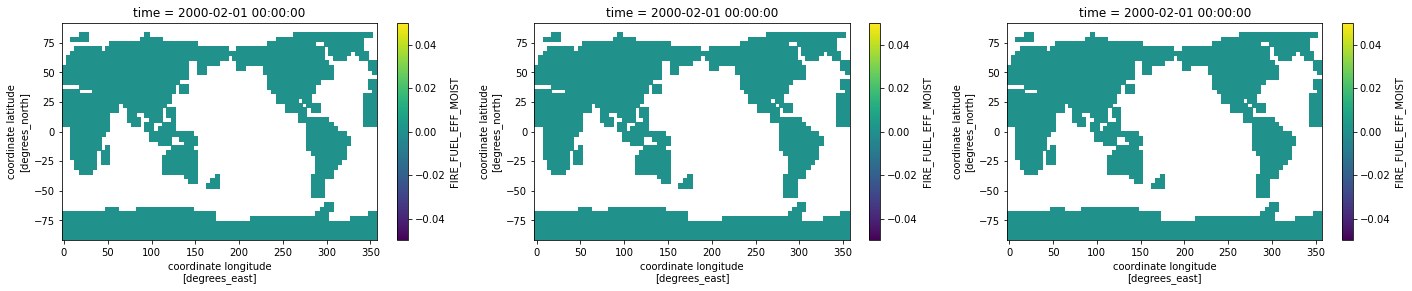

In [8]:
tstop_idx = 0

fuel_eff_moist_Ddiff_001_020 = fuel_eff_moist_tdiff_001 - fuel_eff_moist_bdiff_020
fuel_eff_moist_Ddiff_001_002 = fuel_eff_moist_tdiff_001 - fuel_eff_moist_bdiff_002
fuel_eff_moist_Ddiff_002_020 = fuel_eff_moist_bdiff_002 - fuel_eff_moist_bdiff_020

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 4))
fuel_eff_moist_Ddiff_001_020.isel(time=tstop_idx).plot(ax=ax1,robust=True)
fuel_eff_moist_Ddiff_001_002.isel(time=tstop_idx).plot(ax=ax2,robust=True)
fuel_eff_moist_Ddiff_002_020.isel(time=tstop_idx).plot(ax=ax3,robust=True)

The above plot shows the difference of the differences between the baseline (ctsm1.0.dev113) and both ctsm5.1 dev tags (020 and 002) which confirms the differences are the same at the start of the simulation.

_Effective Fuel moisture at 10 years (dev020 and dev002 only)_

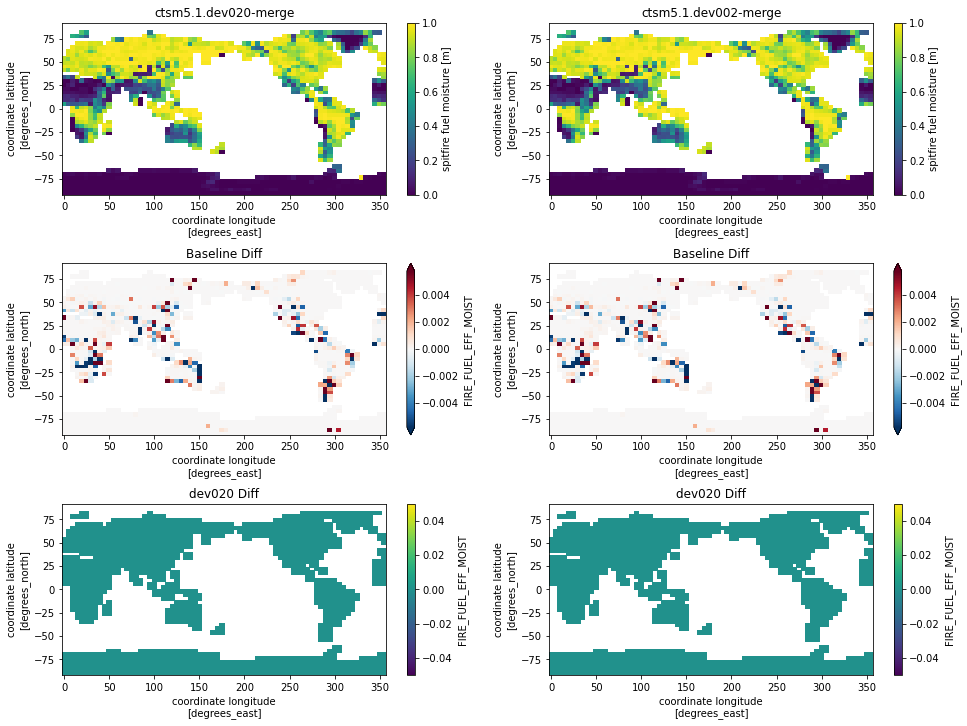

In [9]:
# tstop_idx = 11
tstop_idx = 119
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 12))
fuel_eff_moist_test_020.isel(time=tstop_idx).plot(ax=ax1)
fuel_eff_moist_test_002.isel(time=tstop_idx).plot(ax=ax2)

fuel_eff_moist_bdiff_020.isel(time=tstop_idx).plot(ax=ax3,robust=True)
fuel_eff_moist_bdiff_002.isel(time=tstop_idx).plot(ax=ax4,robust=True)

fuel_eff_moist_tdiff_020.isel(time=tstop_idx).plot(ax=ax5,robust=True)
fuel_eff_moist_tdiff_002.isel(time=tstop_idx).plot(ax=ax6,robust=True)

ax1.set_title('ctsm5.1.dev020-merge')
ax2.set_title('ctsm5.1.dev002-merge')

ax3.set_title('Baseline Diff');
ax4.set_title('Baseline Diff');

ax5.set_title('dev020 Diff');
ax6.set_title('dev020 Diff');

plt.subplots_adjust(hspace=0.4)

From the above plot we see that dev tags 020 and 002 result in the same effective fuel moisture results after 10 years.  Thus the differences originally seen between ctsm1.0.dev113 and ctsm5.1.dev020 in the original regression tests from dev020 can reasonably be assumed to be due to the changes in dev 002.  The relevant PR for those changes ctsm PR [#1086](https://github.com/ESCOMP/CTSM/pull/1086) in which calls to `qsat` are now pointing toward the ctsm native subroutine in QsatMod.

## Appendix - Additional plots

The following plots show the results for the variables that go into calculating `FIRE_FUEL_EFF_MOIST`.

_Nesterov Index_

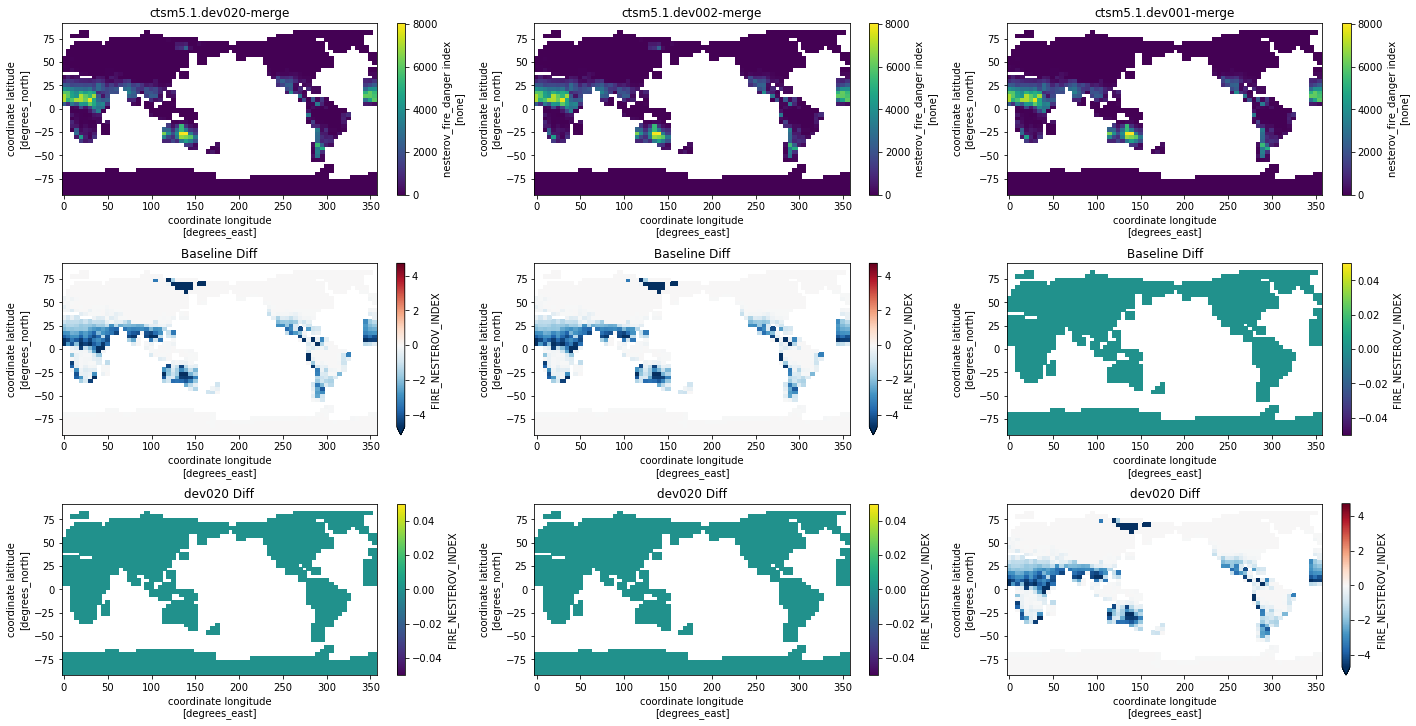

In [10]:
tstop_idx = 0
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(24, 12))
fire_nesterov_020.isel(time=tstop_idx).plot(ax=ax1)
fire_nesterov_002.isel(time=tstop_idx).plot(ax=ax2)
fire_nesterov_001.isel(time=tstop_idx).plot(ax=ax3)

fire_nesterov_bdiff_020.isel(time=tstop_idx).plot(ax=ax4,robust=True)
fire_nesterov_bdiff_002.isel(time=tstop_idx).plot(ax=ax5,robust=True)
fire_nesterov_bdiff_001.isel(time=tstop_idx).plot(ax=ax6,robust=True)

fire_nesterov_tdiff_020.isel(time=tstop_idx).plot(ax=ax7,robust=True)
fire_nesterov_tdiff_002.isel(time=tstop_idx).plot(ax=ax8,robust=True)
fire_nesterov_tdiff_001.isel(time=tstop_idx).plot(ax=ax9,robust=True)

ax1.set_title('ctsm5.1.dev020-merge')
ax2.set_title('ctsm5.1.dev002-merge')
ax3.set_title('ctsm5.1.dev001-merge')
ax4.set_title('Baseline Diff');
ax5.set_title('Baseline Diff');
ax6.set_title('Baseline Diff');
ax7.set_title('dev020 Diff');
ax8.set_title('dev020 Diff');
ax9.set_title('dev020 Diff');
plt.subplots_adjust(hspace=0.4)

_Fuel moisture (by fuel level) difference between baseline and dev020_

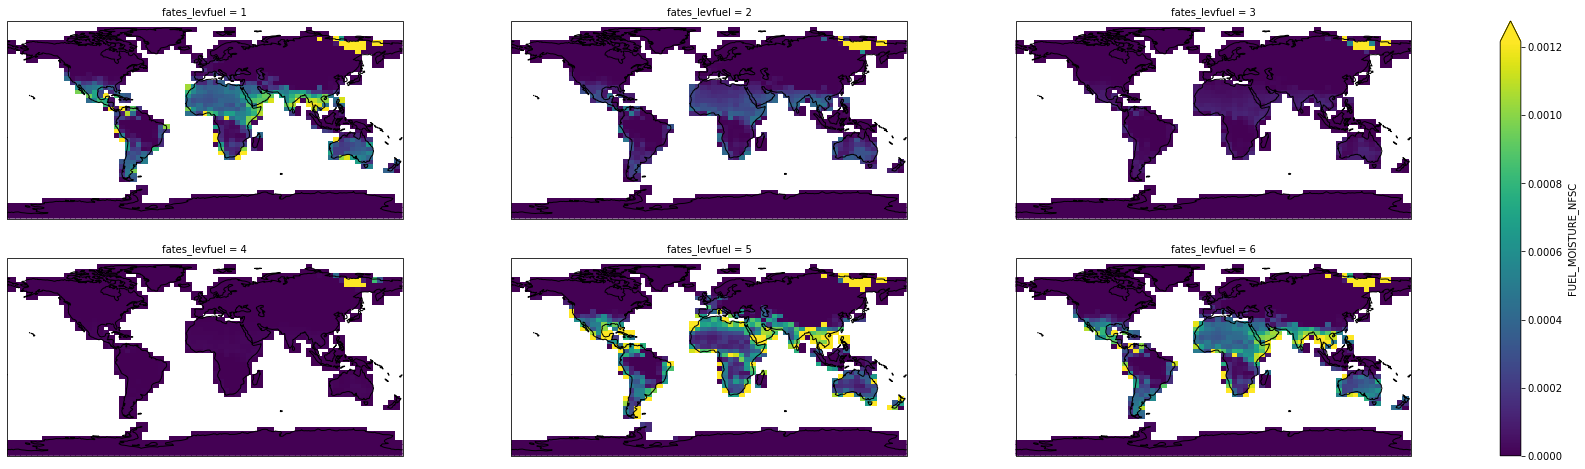

In [12]:
tstop_idx = 0
fg = fuel_moisture_bdiff_020.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()}, robust=True)
for ax in fg.axes.flat:
    ax.coastlines()

_Fuel moisture (by fuel level) difference between baseline and dev002_

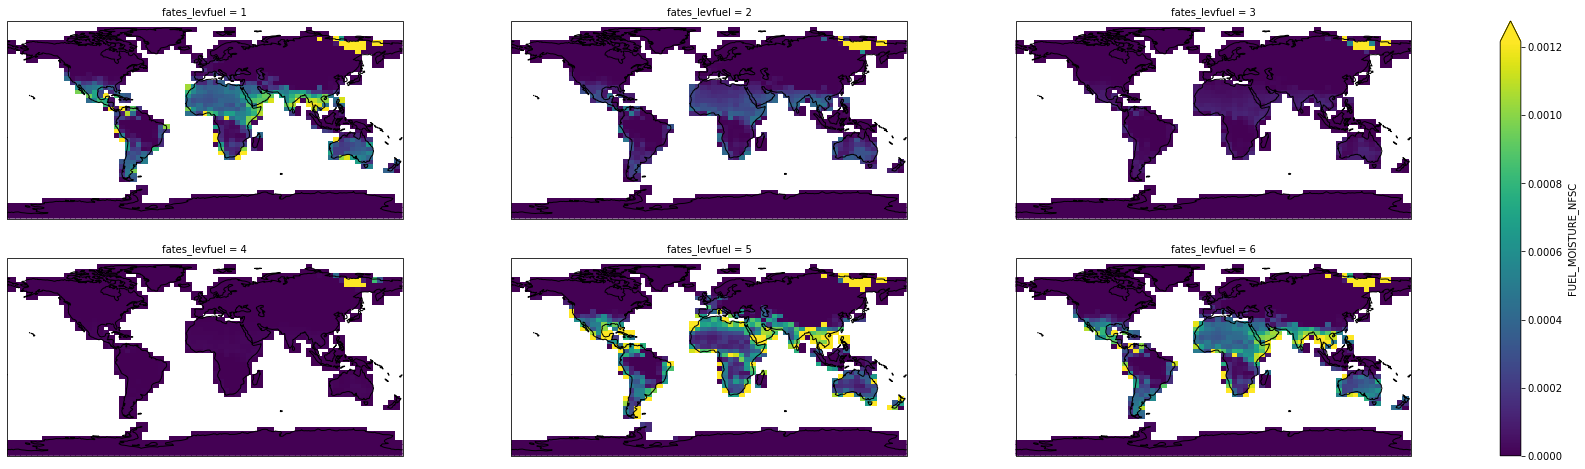

In [13]:
tstop_idx = 0
fg = fuel_moisture_bdiff_002.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()}, robust=True)
for ax in fg.axes.flat:
    ax.coastlines()

_Fuel moisture (by fuel level) difference between differences of dev 020 and 002_

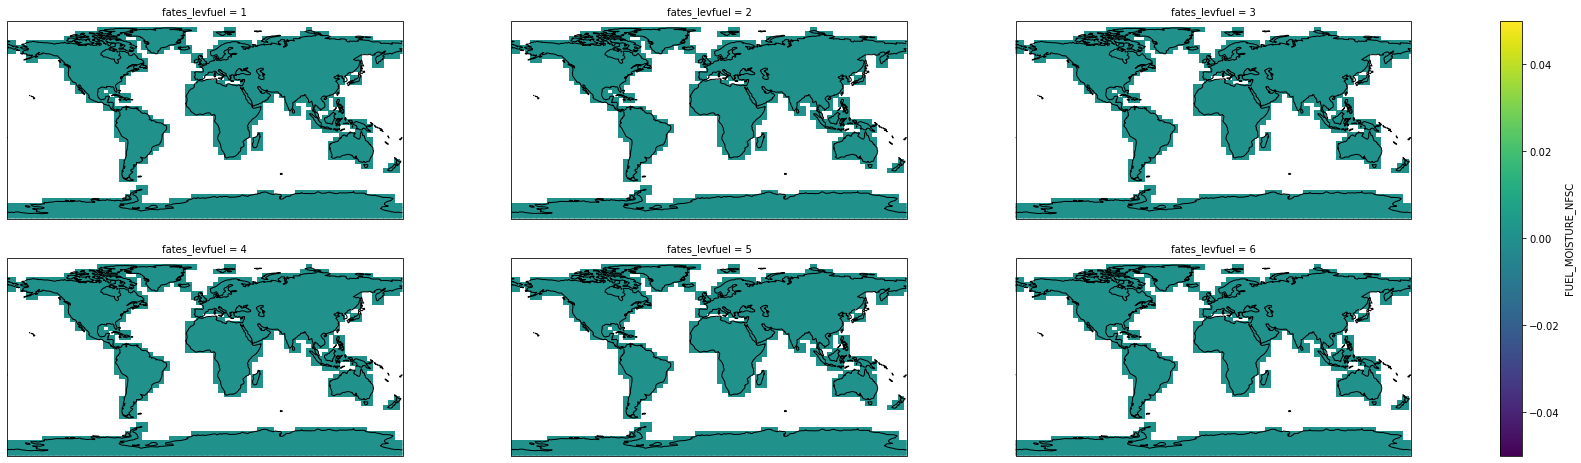

In [14]:
fuel_moisture_Ddiff_002_020 = fuel_moisture_bdiff_002 - fuel_moisture_bdiff_020
tstop_idx = 119
fg = fuel_moisture_Ddiff_002_020.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()}, robust=True)
for ax in fg.axes.flat:
    ax.coastlines()